# Simple Linear regression

We want to study **statistical relationships** among variables. A statistical relationship between variables is not perfect as in a deterministic relationship.

As an example of statistical relationship we have the response variable $w$ ($y$) as the weights of 10 students $h$ ($x$) is the hight. 
![](https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/01simple/heightweight.jpeg)

What is the best fitting line $w=b+ah$? Let's take a look to the tables below: (__[see the following source](https://onlinecourses.science.psu.edu/stat501/node/252)__):

![](https://i.imgur.com/PVZpylb.png)

￼In order to examine which of the two lines is a better fit, we first need to introduce some common notation:

- $y_i$ denotes the observed response for experimental unit $i$.
- $x_i$ denotes the predictor value for experimental unit $i$.
- $\hat{y}_i$ is the predicted response (or fitted value) for experimental unit $i$.

Then, the equation for the best fitting line is:
$\hat{y}_i=b_0+b_1x_i$.

When we use $\hat{y}_i=b_0+b_1x_i$ to predict the actual response $y_i$, we make a **prediction error (or residual error)** of size:
$e_i=y_i-\hat{y}_i$.

A line that fits the data "best" will be one for which the $n$ prediction errors are as small as possible in some overall sense. One way to achieve this goal is to invoke the "least squares criterion," which says to "minimize the sum of the squared prediction errors." That is:

- The equation of the best fitting line is: $\hat{y}_i=b_0+b_1x_i$.
- We just need to find the values $b_0$ and $b_1$ that make the sum of the squared prediction errors the smallest it can be.
- That is, we need to find the values $b_0$ and $b_1$ that minimize:

$Q=\sum_{i=1}^n (y_i - \hat{y}_i)^2$.

We want to minimize the equation for the sum of the squared prediction errors:

$Q=\sum_{i=1}^n (y_i - (b_0+b_1x_i))^2$.

We take the derivative with respect to $b_0$ and $b_1$, set to 0, and solve for $b_0$ and $b_1$, 
and get the "least squares estimates" for $b_0$ and $b_1$:

$b_0 = \bar{y} - b_1\bar{x}$


and:

 
$b_1=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i−\bar{x})^2}$.

Because the formulas for $b_0$ and $b1$ are derived using the least squares criterion, the resulting equation $\hat{y}_i=b_0+b_1x_i$ is often referred to as the "least squares regression line," or simply the "least squares line." It is also sometimes called the "estimated regression equation." 

Take a look to the equation above and try to interpret the sign of the slope $b_1$. What is the meaning of the intercept $b_0$?

**What can we do with our model?**

### Simple linear regression assumptions

We need to check the appropriateness of a simple linear regression model. The four conditions (**"LINE"**) that comprise the simple linear regression model are:

- The mean of the response, $E(Y_i)$, at each value of the predictor, $x_i$, is a Linear function of the $x_i$.
- The errors, $\epsilon_i$, are Independent.
- The errors, $\epsilon_i$, at each value of the predictor, $x_i$, are Normally distributed.
- The errors, $\epsilon_i$, at each value of the predictor, $x_i$, have Equal variances (denoted $\sigma^2$).

See __[SLR Model Assumptions](https://onlinecourses.science.psu.edu/stat501/node/275)__.

Sources and Resources:
- https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/
- https://onlinecourses.science.psu.edu/stat501/node/250

In [1]:
import pandas as pd
import numpy as np

# Note that the string concatenation allows to break the url address 
data = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/" 
                   "Rdatasets/master/csv/datasets/faithful.csv",
                  index_col=0)

# Describe the data
print(data.head())

print(data.describe())

   eruptions  waiting
1      3.600       79
2      1.800       54
3      3.333       74
4      2.283       62
5      4.533       85
        eruptions     waiting
count  272.000000  272.000000
mean     3.487783   70.897059
std      1.141371   13.594974
min      1.600000   43.000000
25%      2.162750   58.000000
50%      4.000000   76.000000
75%      4.454250   82.000000
max      5.100000   96.000000


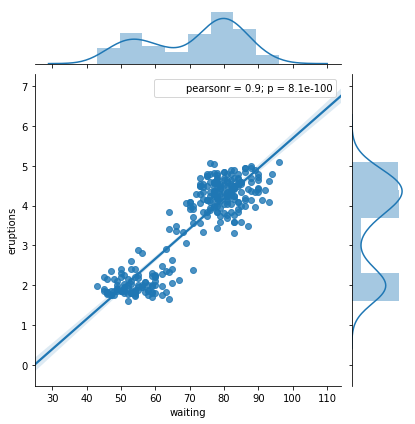

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot("waiting", "eruptions", data, kind="reg")
plt.show()

In [17]:
from sklearn import linear_model

# Create linear regression object
lr = linear_model.LinearRegression()

X = data['waiting']
X = X.values.reshape(len(X), 1)  # This is a column

Y = data['eruptions']

# Train the model using waiting as X, and eruptions as Y
lr.fit(X, Y)

print("Coeffcients:", lr.coef_, " \nIntercept:", lr.intercept_)

Coeffcients: [0.07562795]  
Intercept: -1.8740159864107393


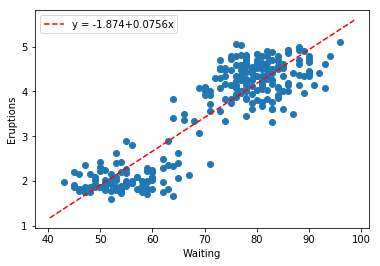

In [18]:
def abline(slope, intercept, leg=1):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'r--')
    if leg:
        axes.legend(['y = ' + str(round(intercept, 4)) + 
                        '+' + str(round(slope, 4))+ 'x'])
    

fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.xlabel('Waiting'); plt.ylabel('Eruptions') 

# need a slope and c to fix the position of line
slope = lr.coef_[0]
intercept = lr.intercept_

abline(slope, intercept)

plt.show()

In [19]:
# Test our model
from sklearn import metrics  

y_pred = lr.predict(X)  # Y predicted by the model

print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, y_pred))) 
print('R-square:', metrics.r2_score(Y, y_pred))

# We are 0.49 away from the truth eruptions value for our data set.
# 81% of the variation of eruptions is explained by waiting

Mean Absolute Error: 0.40194339340159707
Mean Squared Error: 0.24471241070845534
Root Mean Squared Error: 0.49468415247353065
R-square: 0.8114607609733095


## We can use our model to predict unseen data

In [20]:
waiting_new = 80
lr.predict([[waiting_new]])
# Interpret the value below

array([4.17621985])

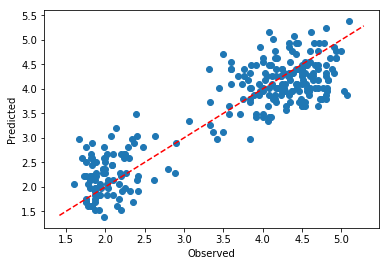

In [21]:
""" 
We can evaluate the model with a scatter plot
of Y (actual) and y_pred (predicted) values
If they align in a line with slope of 1 
the regression have been perfect (no errors)
""" 

fig, ax = plt.subplots()
ax.scatter(Y, y_pred)
plt.xlabel('Observed'); plt.ylabel('Predicted') 

abline(1, 0, 0)

plt.show()

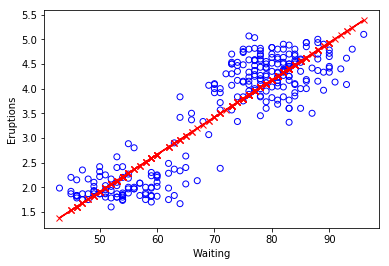

In [22]:
# Plot outputs
plt.scatter(X, Y,  color='blue', facecolors='none')
plt.plot(X, y_pred, '-rx')
plt.xlabel('Waiting'); plt.ylabel('Eruptions') 
plt.show()

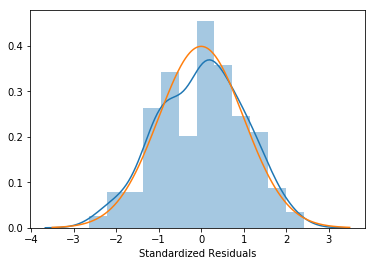

In [23]:
from sklearn import preprocessing
from scipy.stats import norm

model_residuals = Y - y_pred  # Residuals

# We will standardize the residuals and will 
# overlap a standard normal distibution
# Assumption: risiduals must be normal

model_norm_residuals = preprocessing.scale(model_residuals)

m, s = 0, 1
x = np.arange(m-3.5*s, m+3.5*s, 0.01)
px = norm.pdf(x, m, s)

sns.distplot(model_norm_residuals)
plt.plot(x, px, linestyle="-")
plt.xlabel('Standardized Residuals');
plt.show()

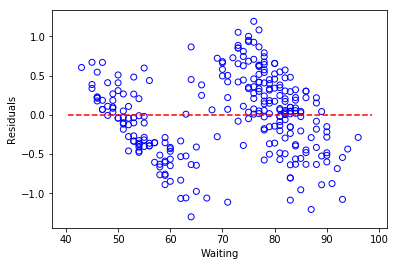

In [24]:
plt.scatter(X, model_residuals,  color='blue', facecolors='none')
abline(0,0,0)
plt.xlabel('Waiting'); plt.ylabel('Residuals') 

plt.show()

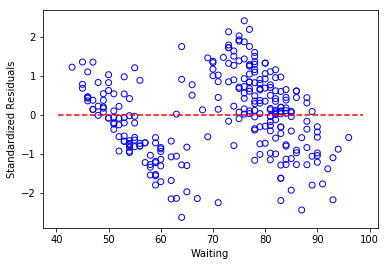

In [25]:
plt.scatter(X, model_norm_residuals,  color='blue', facecolors='none')
abline(0,0,0)
plt.xlabel('Waiting'); plt.ylabel('Standardized Residuals') 

plt.show()

### This will get denser

- We will replicate plots that R do in one command:

```
> data <- read.csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/faithful.csv", row.names=1)
> eruption.lm <- lm(eruptions ~ waiting, data=faithful)
> plot(eruption.lm)
```

- Try to understand the code below and reuse it.
    - See: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Scikit Learn: is a machine learning library, with the aim of building predictors.
- If you need to build a linear regression as a model and understand the model go the link above.
    - Also take a look at the end of this notebook (Source: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression).

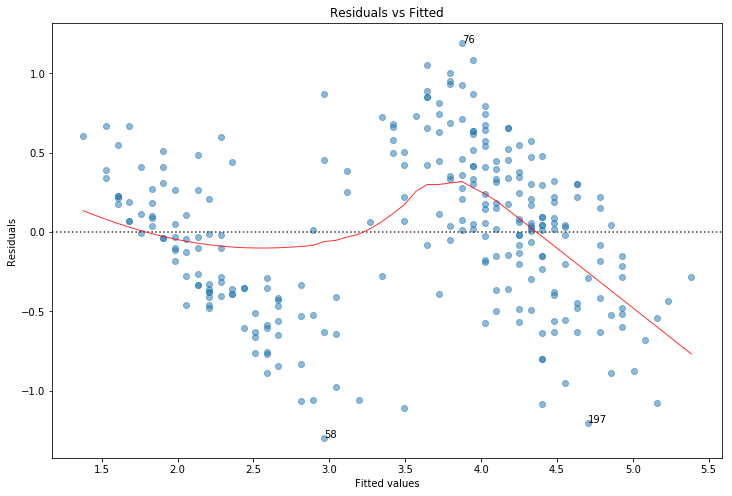

In [26]:
model_abs_resid = np.abs(model_residuals)  # Residuals absolute value

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(y_pred, 'eruptions', data=data, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(Y[i] - model_residuals[i], 
                                   model_residuals[i]));

plt.show()

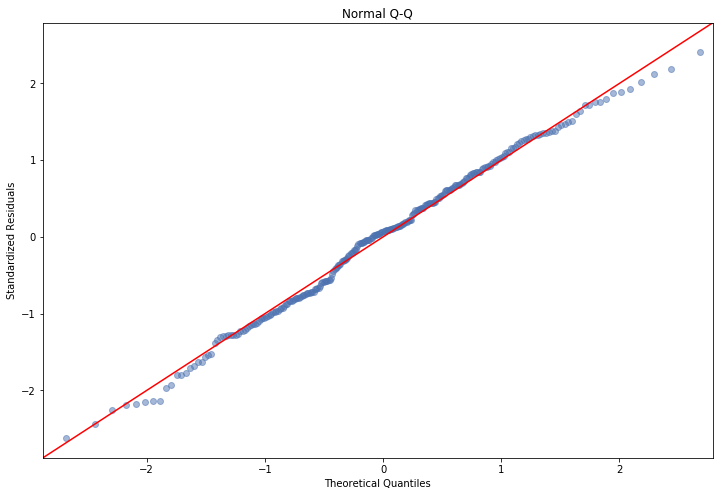

In [27]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

plt.show()

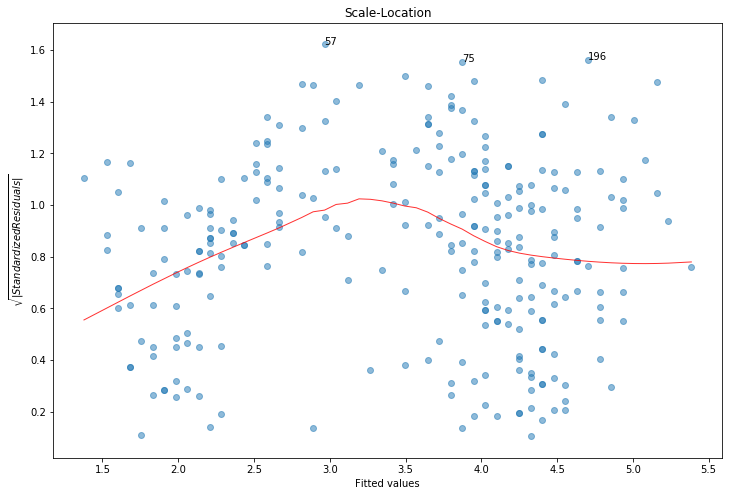

In [28]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(y_pred, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(y_pred, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(y_pred[i], 
                                   model_norm_residuals_abs_sqrt[i]));
    
plt.show()

In [29]:
import statsmodels.api as sm
from scipy import stats

X_data = data['waiting']
y = data['eruptions']

# sm does not include intercept by default we have to manually add it 
X2 = sm.add_constant(X_data)
est = sm.OLS(y, X2)  # Ordinary least squares
est2 = est.fit()  # fit model
print(est2.summary())
print("Residual standard error:", np.sqrt(est2.mse_resid))

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          8.13e-100
Time:                        21:54:22   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

Look for the analysis of variance (ANOVA) F-test, to assess the model,
and P>|t|, to assess the variable importance (coefficients)
See: 
- http://blog.minitab.com/blog/adventures-in-statistics-2/what-is-the-f-test-of-overall-significance-in-regression-analysis
- http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
- http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit